In [60]:
%matplotlib inline

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('../csv-data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [64]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [65]:
df.head(5)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [66]:
df[:5]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [67]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [68]:
#컬럼 == 변수 == 특성(feature, 피쳐) 
#속성(property, attribute) == entry
#열 == fields == 항목

In [69]:
## 저장할 데이터의 컬럼을 선저아는 것이 중요!
## 컬럼을 재가공
## 피쳐 엔지니어링

In [70]:
## 컬럼간의 상관정도를 수치로 표현하여 컬럼간의 관계성을 고려해볼 수 있음.
## 상관도: 상관이 있는 정도(Correlation)
## 상관계수: 상관 정도가 수치로 표현된 것(corr())

In [71]:
## 상관 <----> 연관
## 상관: 관계가 있긴 있음을 나타내는 정도(인과관계 없음)
## 연관: 관계가 있고, 하나가 다른 하나에 영향(인과관계 있음)을 미치는 정도

In [72]:
# 살균제 양, 살균제 사용연령, 기후, 방의 크기, 살균제 사용 기간, 층의 높이, 사망여부
# 기후, 층의 높이, 방의 크기: 상관이 없는 항목처럼 보임.
# 기후, 층, 방의 크기는 corr()을 구해보면 아주 낮은 상관도를 보임.(0.0001)

In [73]:
## 상관도를 구할 때 사용하는 방법
## 1) corr()함수를 이용
## 2) 그래프를 이용- heatmap(), pairplot()

In [74]:
df[['wine_servings', 'beer_servings']].corr()

,wine_servings,beer_servings
wine_servings,1.000000,0.527172
beer_servings,0.527172,1.000000


In [75]:
# 상관도를 구하고 나서 수치보는 법
# 0.7~1 : 높은 상관관계
# 0.5~0.7 : 중간 상관관계
# 0.3~0.5 : 낮은 상관관계
# 0 ~ 0.3 : 아주 낮은 상관관계
# 상관계수가 +이면, 양의 상관관계
# 상관계수가 -이면, 음의 상관관계

In [76]:
# wine, beer
# spirit : 보드카
# total_litres_of_pure_alcohol : 총 알콜 소비량 

In [77]:
corr = df.corr() #피어슨 상관계수
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


In [78]:
import seaborn as sbs

In [79]:
cols = ['beer', 'spirit', 'wine', 'alcohol']

In [80]:
sns.set(font_scale=1.5)

<AxesSubplot:>

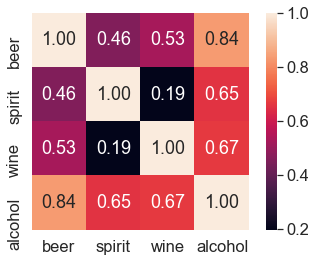

In [81]:
sns.heatmap(corr.values,
            cbar = True,
            annot= True,
            square=True, 
            fmt = '.2f',
            xticklabels=cols,
            yticklabels=cols
           )

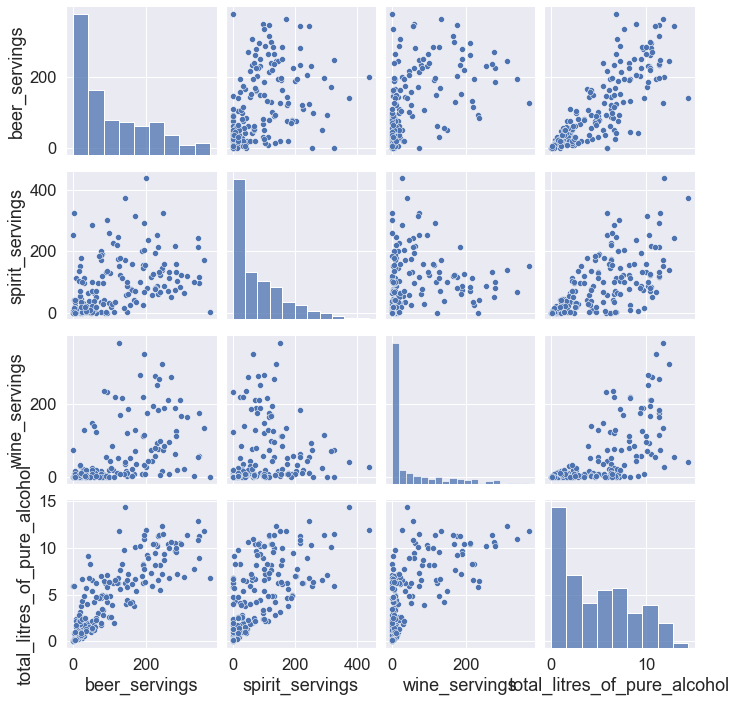

In [82]:
sns.pairplot(df, height=2.5)
plt.show()

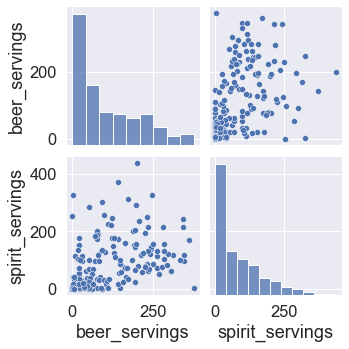

In [83]:
sns.pairplot(df[['beer_servings', 'spirit_servings']], height=2.5)
plt.show()

In [84]:
##titanic data read! -> corr, heatmap, pairplot
df2 = pd.read_csv('../csv-data/titanic.csv')
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [86]:
corr2= df2.corr()
corr2

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [96]:
sns.set(font_scale=1)

In [97]:
cols2 = ['survived','pclass','age','sibsp','parch','fare','adult_male','alone']

<AxesSubplot:>

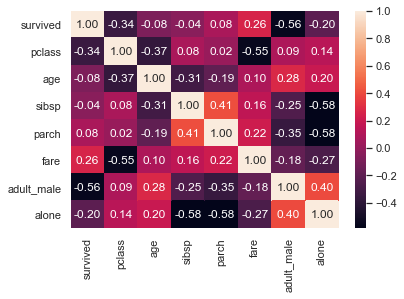

In [98]:
sns.heatmap(corr2.values,
            cbar = True,
            annot= True,
            fmt = '.2f',
            xticklabels=cols2,
            yticklabels=cols2
           )

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


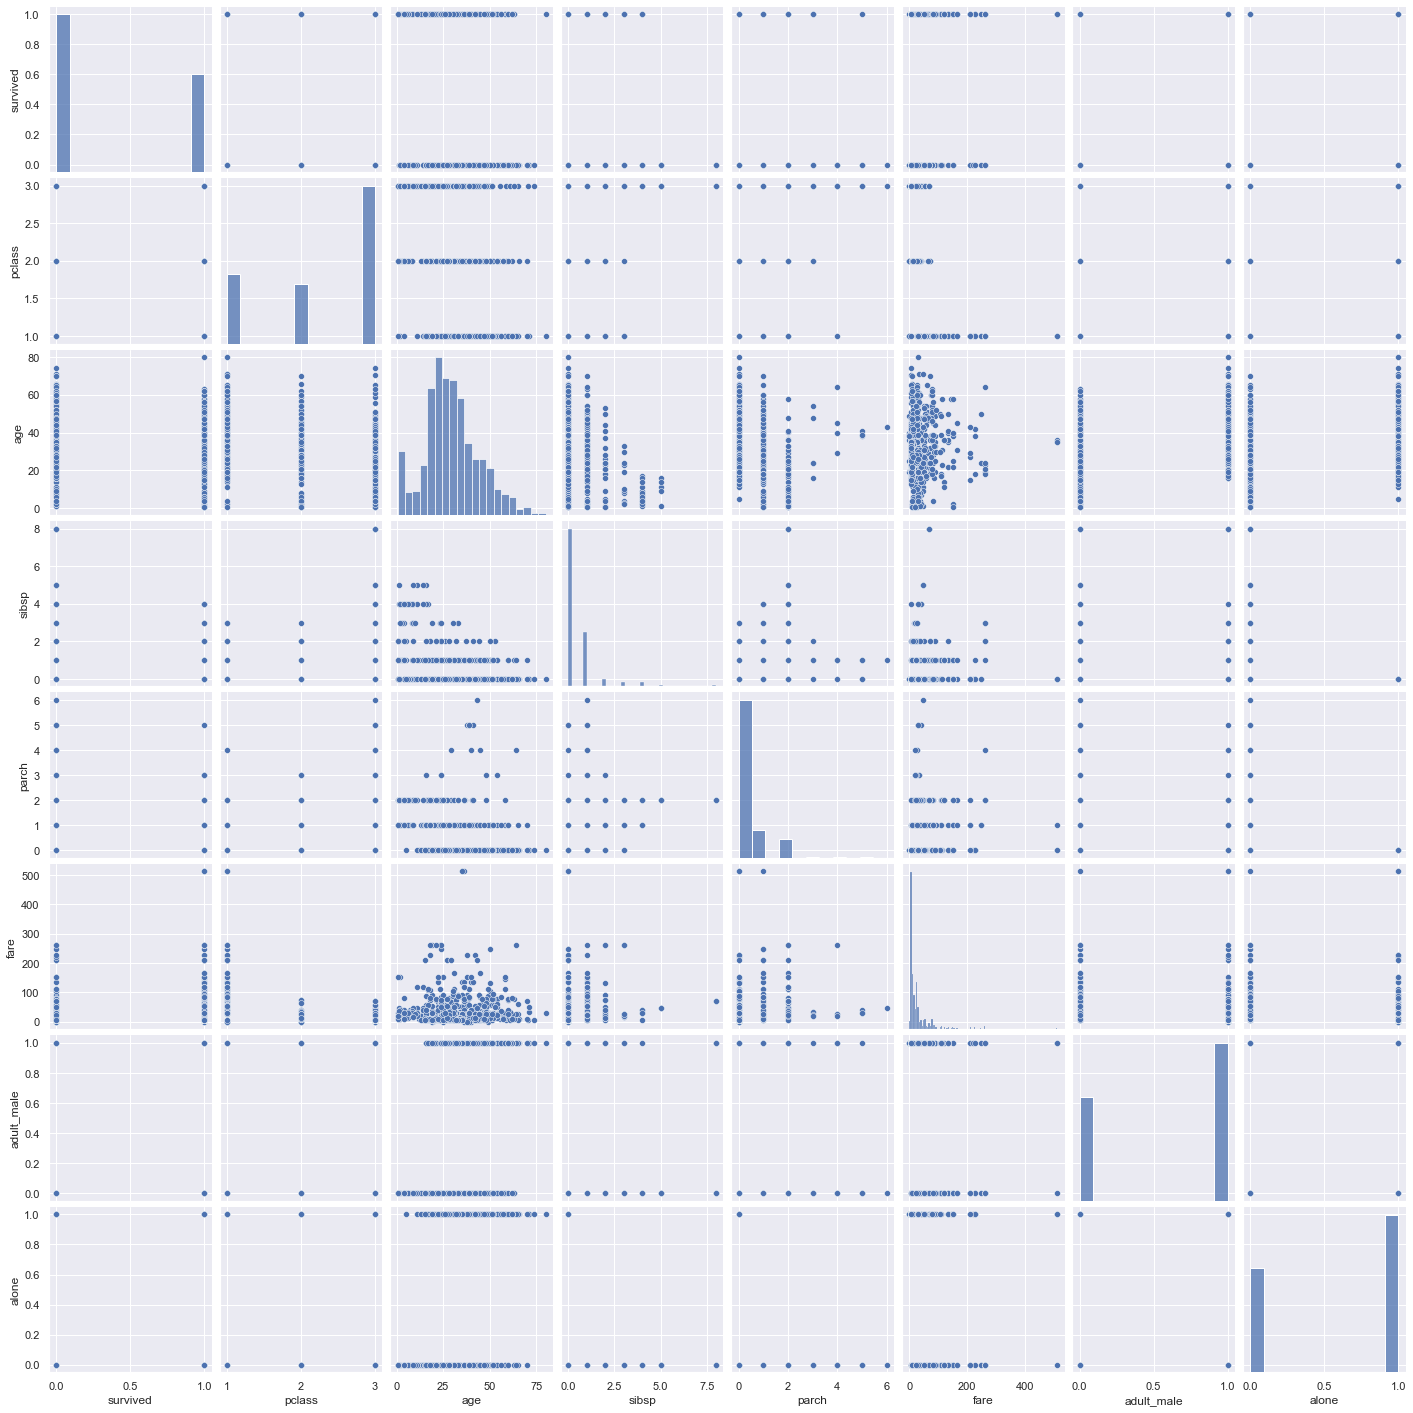

In [101]:
sns.pairplot(df2[cols2])
plt.show()

In [102]:
# 대륙별 비율 파이차트로 구해보자!
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [104]:
df['continent']

0      AS
1      EU
2      AF
3      EU
4      AF
       ..
188    SA
189    AS
190    AS
191    AF
192    AF
Name: continent, Length: 193, dtype: object

In [106]:
continent_count = df['continent'].value_counts()
continent_count

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [107]:
type(continent_count) #index+values

pandas.core.series.Series

In [110]:
index = continent_count.index
index

Index(['AF', 'EU', 'AS', 'OC', 'SA'], dtype='object')

In [111]:
values = continent_count.values
values

array([53, 45, 44, 16, 12])

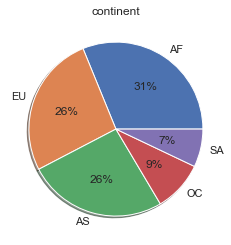

In [116]:
plt.pie(values, labels=index, autopct='%.0f%%', shadow=True)
plt.title('continent')
plt.show()

In [121]:
df[df['continent']=='US']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


In [124]:
print(df.isnull().sum())
print(df.dtypes)

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object


In [126]:
print(df.isna().sum())

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64


In [128]:
print(df['continent'].isnull().sum())

23


In [129]:
df['continent'] = df['continent'].fillna('OT')
print(df['continent'].isnull().sum())

0


In [130]:
continent_count = df['continent'].value_counts()
continent_count

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [132]:
index = continent_count.index
print('index', index)
values = continent_count.values
print('values', values)

index Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')
values [53 45 44 23 16 12]


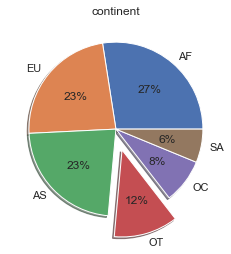

In [136]:
explode = (0, 0, 0, 0.25, 0, 0)
plt.pie(values, 
        labels=index, 
        explode = explode,
        autopct='%.0f%%', 
        shadow=True)
plt.title('continent')
plt.show()

In [138]:
result = df.groupby('continent')['beer_servings'].sum()
result

continent
AF    3258
AS    1630
EU    8720
OC    1435
OT    3345
SA    2101
Name: beer_servings, dtype: int64

In [139]:
result = df.groupby('continent')['beer_servings'].mean()
result

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [140]:
result = df.groupby('continent')['beer_servings'].min()
result

continent
AF     0
AS     0
EU     0
OC     0
OT     1
SA    93
Name: beer_servings, dtype: int64

In [141]:
result = df.groupby('continent')['beer_servings'].max()
result

continent
AF    376
AS    247
EU    361
OC    306
OT    285
SA    333
Name: beer_servings, dtype: int64

In [142]:
result = df.groupby('continent')['beer_servings'].agg(['sum', 'mean'])
result

,sum,mean
continent,,
AF,3258,61.471698
AS,1630,37.045455
EU,8720,193.777778
OC,1435,89.687500
OT,3345,145.434783
SA,2101,175.083333


In [145]:
#wine의 대륙별 합계, 평균, 최대를 구해보세요.
result = df.groupby('continent')['wine_servings'].agg(['sum', 'mean', 'max'])
result

,sum,mean,max
continent,,,
AF,862,16.264151,233
AS,399,9.068182,123
EU,6400,142.222222,370
OC,570,35.625000,212
OT,564,24.521739,100
SA,749,62.416667,221


In [144]:
beer_continent = df.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


In [147]:
## 전체 알콜 소비량 평균보다 많은 알코올을 섭취하는 대륙을 구해보세요.
## 전체 알콜 소비량 평균
total_mean = df['total_litres_of_pure_alcohol'].mean()
total_mean

4.717098445595855

In [148]:
# 대륙별 알코올 소비 평균
con_mean = df.groupby('continent')['total_litres_of_pure_alcohol'].mean()
con_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [149]:
type(con_mean) #Series = index + values

pandas.core.series.Series

In [151]:
con_mean > total_mean

continent
AF    False
AS    False
EU     True
OC    False
OT     True
SA     True
Name: total_litres_of_pure_alcohol, dtype: bool

In [159]:
result = con_mean[con_mean > total_mean]
print(result)
print(type(result))

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64
<class 'pandas.core.series.Series'>


In [160]:
result.idxmax() 
#result Series values중에서 max값을 가지는 index를 추출

'EU'

In [197]:
# 맥주의 평균값을 구해보고,
beer_mean = df['beer_servings'].mean()
print(beer_mean)

# 맥주의 평균값보다 높은 대륙 리스트를 구해보세요.
# 대륙별 평균값을 구해보자.!
beer_con_mean = df.groupby('continent')['beer_servings'].mean() 
print(beer_con_mean) 
# 그룹을 지어서 하나의 컬럼의 집계함수를 적용한 결과타입은 Series!!
# Series는 "df의 컬럼"처럼 다루면 됨.
print(type(beer_con_mean))

result2 = beer_con_mean[beer_con_mean > beer_mean]
print(result2)

print('==================================')

beer_con_mean2 = df.groupby('continent')[['beer_servings', 'wine_servings']].mean() 
print(beer_con_mean2) 
# 그룹을 지어서 두 개이상의 컬럼의 집계함수를 적용한 결과타입은 DataFrame!!
# DataFrame인 경우, 특정 컬럼을 선정한 후 처리를 해야함.
print(type(beer_con_mean2))


# 맥주의 최대값을 가지는 대륙은 어디인가요?
beer_con_max = result2.idxmax() 
print('beer_con_max>> ', beer_con_max)

106.16062176165804
continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64
<class 'pandas.core.series.Series'>
continent
EU    193.777778
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64
           beer_servings  wine_servings
continent                              
AF             61.471698      16.264151
AS             37.045455       9.068182
EU            193.777778     142.222222
OC             89.687500      35.625000
OT            145.434783      24.521739
SA            175.083333      62.416667
<class 'pandas.core.frame.DataFrame'>
beer_con_max>>  EU


In [ ]:
# 맥주의 평균값보다 높은 나라 리스트 프린트
# 맥주의 평균값보다 높은 나라와 맥주의 소비량 프린트
# 맥주의 평균값보다 높은 나라 리스트의 갯수 프린트

In [152]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [153]:
## beer_servings가 200이상인 것들만 추출!
df['beer_servings'] >= 200

0      False
1      False
2      False
3       True
4       True
       ...  
188     True
189    False
190    False
191    False
192    False
Name: beer_servings, Length: 193, dtype: bool

In [157]:
df[df['beer_servings'] >= 200]['beer_servings']

3      245
4      217
8      261
9      279
16     295
17     263
23     245
25     231
32     240
42     230
45     361
48     224
57     224
60     263
62     347
65     346
75     234
76     233
81     313
93     281
98     343
99     236
109    238
117    376
120    251
121    203
129    306
130    285
132    213
135    343
140    297
141    247
151    283
156    270
159    225
160    284
180    206
182    219
184    249
188    333
Name: beer_servings, dtype: int64

In [169]:
df['beer_servings'][df['beer_servings'] >= 200]

3      245
4      217
8      261
9      279
16     295
17     263
23     245
25     231
32     240
42     230
45     361
48     224
57     224
60     263
62     347
65     346
75     234
76     233
81     313
93     281
98     343
99     236
109    238
117    376
120    251
121    203
129    306
130    285
132    213
135    343
140    297
141    247
151    283
156    270
159    225
160    284
180    206
182    219
184    249
188    333
Name: beer_servings, dtype: int64

In [170]:
df[df['beer_servings'] >= 200][['beer_servings', 'country']]

,beer_servings,country
3,245,Andorra
4,217,Angola
8,261,Australia
9,279,Austria
16,295,Belgium
17,263,Belize
23,245,Brazil
25,231,Bulgaria
32,240,Canada
42,230,Croatia


In [178]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [179]:
df['country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

In [181]:
df['country'] == 'Angola'

0      False
1      False
2      False
3      False
4       True
       ...  
188    False
189    False
190    False
191    False
192    False
Name: country, Length: 193, dtype: bool

In [185]:
df3 = df[df['country'] == 'Angola']
df3

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
4,Angola,217,57,45,5.9,AF


In [184]:
type(df3)

pandas.core.frame.DataFrame

In [186]:
df3['beer_servings']

4    217
Name: beer_servings, dtype: int64

In [189]:
df3[['beer_servings', 'wine_servings']]

,beer_servings,wine_servings
4,217,45


In [190]:
df[df['country'] == 'Angola'][['beer_servings', 'wine_servings']]

,beer_servings,wine_servings
4,217,45


In [191]:
df['country'][df['country'] == 'Angola']

4    Angola
Name: country, dtype: object

In [192]:
df[df['country'] == 'Angola']['country']

4    Angola
Name: country, dtype: object

In [193]:
df['beer_servings'][df['country'] == 'Angola']
#Series[Series == 조건]

4    217
Name: beer_servings, dtype: int64